In [1]:
pwd

'P:\\Projects\\dalx\\notebooks'

In [2]:
cd ..

P:\Projects\dalx


In [3]:
import pandas as pd
from src.utils import read_yaml, load_semeval15_laptop, search_keyword
pd.set_option('display.max_rows', 500)

In [4]:
dalx = pd.read_csv('data/output/lexicon_table_dalx_07_thres0.7_C10.csv', index_col='WORD')
lexicon = pd.read_csv('data/lx_annotator/s15_annotation_out.csv', index_col='WORD')
lexicon['GENERAL'] = lexicon[['MPQA', 'OPENER', 'OL', 'VADER']].mean(axis=1)
lx = lexicon[['GENERAL', 'ANNOTATION']]
lx = lx.join(dalx[['DALX']])

In [5]:
lx.head()

,GENERAL,ANNOTATION,DALX
WORD,,,
ability,0.775,0.0,1.0
able,1.000,0.0,1.0
above,1.000,1.0,NaN
abrupt,-1.000,-1.0,-1.0
absolute,0.000,0.0,1.0


## General polarity distribution

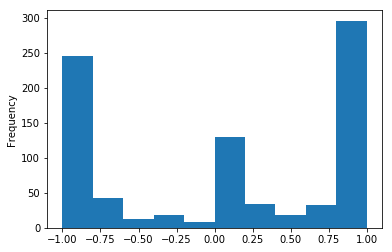

In [6]:
lx.GENERAL.plot.hist()

## Annotation polaritiy distribution

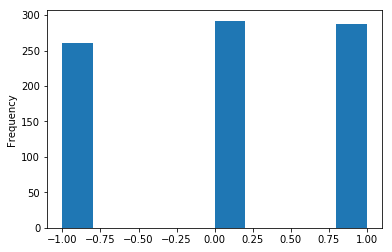

In [8]:
lx.ANNOTATION.plot.hist()

## DALX polarity distribution

In [9]:
_dalx = lx[['DALX']].copy()

In [10]:
_dalx.loc[_dalx.DALX.isna()] = lx.loc[lx.DALX.isna(), ['GENERAL']]

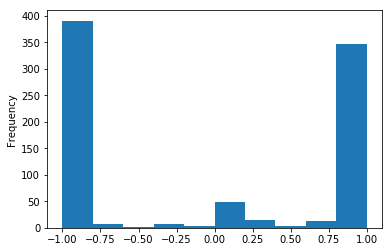

In [11]:
_dalx.DALX.plot.hist()

# Words changed polarity

### Used to be +1 but changed polarity in annotation

Some cases:

`care` / `careful`, In a laptop review domain, some examples usually seen are: 
 
 - for those that **care** about noise this thing does n't really make any ; 0
 - the apple **care** has never failed me , and i expect it to be the same for this computer as well . 0
 - i would say if you want to buy one of these machines be **careful** . -1
 - and , if you are going to deal with hp be **careful** . -1


In [30]:
g_pos_change = lx.loc[(lx.GENERAL > 0) & (lx.ANNOTATION != 1)]
g_pos_change = g_pos_change.join(_dalx.round(4), rsuffix='_full')
g_pos_change

,GENERAL,ANNOTATION,DALX,DALX_full
WORD,,,,
ability,0.775000,0.0,1.0,1.0000
able,1.000000,0.0,1.0,1.0000
acknowledge,1.000000,0.0,-1.0,-1.0000
agree,0.791667,0.0,NaN,0.7917
agreed,0.275000,0.0,NaN,0.2750
allow,0.741667,0.0,1.0,1.0000
amazon,0.175000,0.0,1.0,1.0000
attachment,0.300000,0.0,-1.0,-1.0000
back,1.000000,0.0,-1.0,-1.0000


In [31]:
g_pos_change.ANNOTATION.value_counts()

 0.0    121
-1.0      6
Name: ANNOTATION, dtype: int64

Total **127** *positive* words in the general lexicon changed polarity after annotation. Among them, **121** is annotated to be *nerutal* and **6** is annotated as *negative*

### +1 -> -1

In [33]:
g_pos_change.loc[g_pos_change.ANNOTATION < 0]

,GENERAL,ANNOTATION,DALX,DALX_full
WORD,,,,
careful,0.716667,-1.0,-1.0,-1.0
defeats,0.337500,-1.0,-1.0,-1.0
glossy,1.000000,-1.0,NaN,1.0
hot,1.000000,-1.0,-1.0,-1.0
joke,0.325000,-1.0,-1.0,-1.0
repair,1.000000,-1.0,-1.0,-1.0


It is understandable that these words under the laptop review context should be negative. Also interesting to see that **DALX gets 5/6 of them correct!**. See [glossy screen](https://www.google.com/search?q=glossy+screen&rlz=1C1GCEU_esES821ES821&oq=glossy&aqs=chrome.1.69i57j69i59j0l6.1859j0j7&sourceid=chrome&ie=UTF-8) 

### +1 -> 0

For the 121 words annotated as *neutral*, there are a few types of cases:

- Nouns with polarity when looked alone but neutral in laptop review context
    + `brightness`, `broad` (key broad), `care` (apple care), `durability`, `security` ...
- Proper nouns: 
    + `excel`, `amazon`, `joystick` ...
- Adverbs are marked with polarity in general lexicon with a decent amount:
    + `definitely`, `fairly`, `truly` ...

On the other hand, looking at the word `support`, it is marked as *positive* in the general lexicon, annotated as *neutral* but predicted by DALX as *negative*. 

- Standing alone, it is positive
- In the laptop review context, it usually refers to a particular consumer/business activity. e.g. Apple Support
- When doing the DALX, as vectors are learned from elctronics reviews, thus given the fact that 1. support is needed when something is not working. 2. Few companies have good support. It is reasonable that DALX predicts *negative*


In [38]:
# Full list of 121 +1 annotated as 0 words
g_pos_change.loc[(g_pos_change.ANNOTATION == 0)]

,GENERAL,ANNOTATION,DALX,DALX_full
WORD,,,,
ability,0.775000,0.0,1.0,1.0000
able,1.000000,0.0,1.0,1.0000
acknowledge,1.000000,0.0,-1.0,-1.0000
agree,0.791667,0.0,NaN,0.7917
agreed,0.275000,0.0,NaN,0.2750
allow,0.741667,0.0,1.0,1.0000
amazon,0.175000,0.0,1.0,1.0000
attachment,0.300000,0.0,-1.0,-1.0000
back,1.000000,0.0,-1.0,-1.0000


Looking at the predictions of DALX:

- DALX predicts *positive* 37 words: At least align with the general lexicon
- DALX predicts *neutral* 0 words: None, DALX is only binary classification, predictions below confidence trheshold (0.7) are replaced by values in the general lexicon. **Condiser add neutral seeds for DALX.**
- DALX predicts *negative* 31 words: Creating noise

In [53]:
# g_pos_change.loc[(g_pos_change.ANNOTATION == 0) & (g_pos_change.DALX == 1)] # DALX:+1 37

# g_pos_change.loc[(g_pos_change.ANNOTATION == 0) & (g_pos_change.DALX_full == 0)] # DALX:0 0

g_pos_change.loc[(g_pos_change.ANNOTATION == 0) & (g_pos_change.DALX == -1)] # DALX:-1 31

# g_pos_change.loc[(g_pos_change.ANNOTATION == 0) & ((g_pos_change.DALX == -1) | (g_pos_change.DALX == 1))] # DALX:-1/+1 68

,GENERAL,ANNOTATION,DALX,DALX_full
WORD,,,,
acknowledge,1.000000,0.0,-1.0,-1.0
attachment,0.300000,0.0,-1.0,-1.0
back,1.000000,0.0,-1.0,-1.0
care,0.850000,0.0,-1.0,-1.0
cared,0.450000,0.0,-1.0,-1.0
cheaper,1.000000,0.0,-1.0,-1.0
drive,1.000000,0.0,-1.0,-1.0
fan,0.325000,0.0,-1.0,-1.0
feeling,0.041667,0.0,-1.0,-1.0


---

### Used to be 0 but changed polarity in annotation


**Only 1 word** was *neutral* but **not** annotated as *neutral* now. DALX also predicts correctly for word `quick` here.

Total 110 *neutral* words in the original lexicon, 1 of them is annotated to be *positive*, the other 109 remains the same.

In [57]:
g_neu_change = lx.loc[(lx.GENERAL == 0) & (lx.ANNOTATION != 0)]
g_neu_change = g_neu_change.join(_dalx.round(4), rsuffix='_full')
g_neu_change

,GENERAL,ANNOTATION,DALX,DALX_full
WORD,,,,
quick,0.0,1.0,1.0,1.0


In [62]:
len(lx.loc[lx.GENERAL == 0]) # 110 neutrals in the general lexicon
len(lx.loc[(lx.GENERAL == 0) & (lx.ANNOTATION != 0)]) # among those 110, only 1 is not neutral anymore
len(lx.loc[(lx.GENERAL == 0) & (lx.ANNOTATION == 0)]) # 109 remains neutral

109

---

### Used to be -1 but changed polarity in annotation

In [64]:
g_neg_change = lx.loc[(lx.GENERAL < 0) & (lx.ANNOTATION != -1)]
g_neg_change = g_neg_change.join(_dalx.round(4), rsuffix='_full')
g_neg_change

,GENERAL,ANNOTATION,DALX,DALX_full
WORD,,,,
accident,-0.525000,0.0,-1.0,-1.0000
addict,-1.000000,1.0,-1.0,-1.0000
addicted,-1.000000,1.0,1.0,1.0000
alone,-0.250000,0.0,NaN,-0.2500
although,-1.000000,0.0,NaN,-1.0000
beast,-1.000000,1.0,-1.0,-1.0000
black,-1.000000,0.0,NaN,-1.0000
block,-0.825000,0.0,NaN,-0.8250
bumping,-1.000000,1.0,-1.0,-1.0000


In [65]:
g_neg_change.ANNOTATION.value_counts()

0.0    62
1.0    12
Name: ANNOTATION, dtype: int64

Total **74** *negative* words in the general lexicon changed polarity after annotation. Among them, **62** is annotated to be *nerutal* and **12** is annotated as *negative*

### -1 -> +1

Words is negatively biased when veiwed alone, but under laptop review context, should be positive. DALX is able to get some of them right.

Some examples from the corpus with these words

- i honestly love my mac , thats why i am a self proclaimed mac **addict** . | -1 -> +1
- i am **addicted** to photo booth ! | -1 -> +1
- we are **addicted** to the mac . | -1 -> +1
- another great thing is the **beast** graphics . | -1 -> +1
- * great os , fabulous improvements to the existing line **bumping** up the processor speed and adding the thunderbolt port . | -1 -> +1
- the unibody design is **edgy** and durable . | -1 -> +1
- this laptop is **insane** ! ! ! | -1 -> +1
- my parents bought it for me as a graduation gift , and i 'm totally ( almost kind of maybe definitely ) **obsessed** with it . | -0.17 -> +1
- this is not a **serious** gaming laptop or a **serious** media machine ; | -1 -> 1
- * graphics are clean and **sharp** , internet interfaces are seamless . / once open , the leading edge is razor **sharp** . / it has a decent feel to it , **sharp** display and is fast enough . | -1 -> +1
- it is made better , **thicker** , and all out tough ! | -1 -> +1


In [70]:
g_neg_change.loc[g_neg_change.ANNOTATION == 1]

,GENERAL,ANNOTATION,DALX,DALX_full
WORD,,,,
addict,-1.000000,1.0,-1.0,-1.0000
addicted,-1.000000,1.0,1.0,1.0000
beast,-1.000000,1.0,-1.0,-1.0000
bumping,-1.000000,1.0,-1.0,-1.0000
edgy,-1.000000,1.0,-1.0,-1.0000
insane,-0.856250,1.0,-1.0,-1.0000
killer,-0.956250,1.0,1.0,1.0000
obsessed,-0.175000,1.0,NaN,-0.1750
serious,-0.691667,1.0,NaN,-0.6917


### -1 -> 0

Similar to previous +1 -> 0 cases, most words are annotated to be neutral. Including adv. `extremely`, `litter`, `damn`, proper nouns `matte`, `black`, `fallout`, 

**Some words may need a little bit of review, e.g. `screams`**

In [71]:
g_neg_change.loc[g_neg_change.ANNOTATION == 0]

,GENERAL,ANNOTATION,DALX,DALX_full
WORD,,,,
accident,-0.525000,0.0,-1.0,-1.0000
alone,-0.250000,0.0,NaN,-0.2500
although,-1.000000,0.0,NaN,-1.0000
black,-1.000000,0.0,NaN,-1.0000
block,-0.825000,0.0,NaN,-0.8250
challenge,-0.641667,0.0,1.0,1.0000
charged,-0.200000,0.0,NaN,-0.2000
charges,-0.275000,0.0,NaN,-0.2750
cheap,-1.000000,0.0,-1.0,-1.0000


In [78]:
g_neg_change.loc[(g_neg_change.ANNOTATION == 0) & (g_neg_change.DALX == 1)] # DALX:+1 7

,GENERAL,ANNOTATION,DALX,DALX_full
WORD,,,,
challenge,-0.641667,0.0,1.0,1.0
extremely,-1.000000,0.0,1.0,1.0
game,-1.000000,0.0,1.0,1.0
moon,-1.000000,0.0,1.0,1.0
negligible,-1.000000,0.0,1.0,1.0
set-up,-1.000000,0.0,1.0,1.0
shocked,-0.662500,0.0,1.0,1.0


In [81]:
len(g_neg_change.loc[(g_neg_change.ANNOTATION == 0) & (g_neg_change.DALX == -1)]) # DALX:-1 29

29

In [83]:
g_neg_change.loc[(g_neg_change.ANNOTATION == 0) & (g_neg_change.DALX_full == 0)] # DALX:0 0

,GENERAL,ANNOTATION,DALX,DALX_full
WORD,,,,
